# MNIST

## Data Download

In [1]:
!cd ../benchmark/datasets/mnist && mkdir -pv data/raw

### Valid dataset

In [2]:
from benchmark.datasets.mnist import get_mnist
from torchvision.transforms import ToTensor

dataset = get_mnist('../benchmark/datasets/mnist/data/', total_parts=100)

x, y = dataset[0]

print(x.shape, y.shape)

torch.Size([1, 28, 28]) torch.Size([])


## FedAvg

In [3]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedavg\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## FedEla

In [4]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedela\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## FedSgd

In [13]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedsgd\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## FedProx

In [6]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedprox\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## Scaffold

In [7]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim scaffold\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## Plot Curves

In [8]:
%matplotlib inline

from benchmark.utils.plot import plot

partition = "dirichlet"
task_name = "mnist"

items = dict(
    FedAvg=f'logs/{task_name}/fedavg_{partition}/{task_name}.json',
    FedSgd=f'logs/{task_name}/fedsgd_{partition}/{task_name}.json',
    FedEla=f'logs/{task_name}/fedela_{partition}/{task_name}.json',
    FedProx=f'logs/{task_name}/fedprox_{partition}/{task_name}.json',
    FedScaffold=f'logs/{task_name}/scaffold_{partition}/{task_name}.json',
)

files = items.values()
labels = items.keys()

### Train Accuracy

/Users/densechen/miniconda3/envs/openfed/lib/python3.7/site-packages/benchmark-0.0.0-py3.7.egg/benchmark/utils/plot.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xs, ys = np.array(xs), np.array(ys)


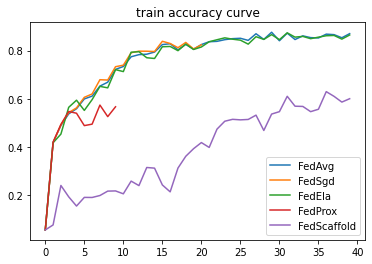

In [9]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode='train'
)

### Train Loss

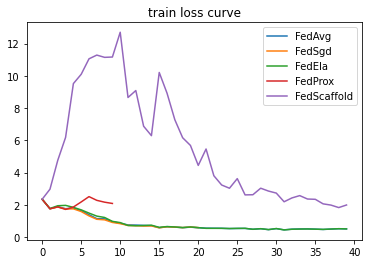

In [10]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode="train"
)

### Test Accuracy

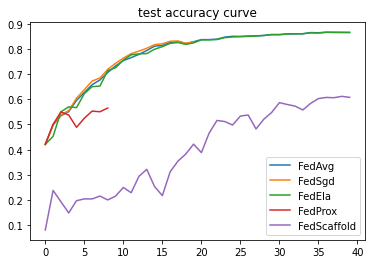

In [11]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode="test"
)

### Test Loss

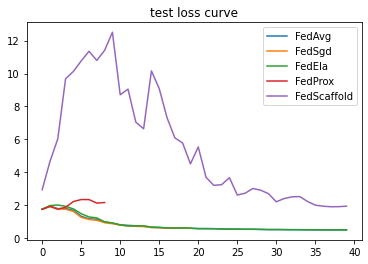

In [12]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode='test'
)